# Data Analysis on oneDNN output

This notebook contains a series of useful scripts that allow to benchmark the performance of onednn-wrapper applications

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

***
# Loss and Accuracy behaviour

Starting from the numpy file containing the loss we can check whether our network is learning

### Skin dataset

This code is meant to be run using the skin dataset and associated configuration file

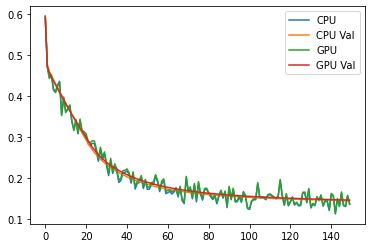

In [4]:
loss_cpu = np.load("data/losses/skin_loss_cpu.npy")
loss_cpu_val = np.load("data/losses/skin_loss_cpu_inf.npy")
loss_gpu = np.load("data/losses/skin_loss_gpu.npy")
loss_gpu_val = np.load("data/losses/skin_loss_gpu_inf.npy")


plt.plot(loss_cpu, label="CPU")
plt.plot(loss_cpu_val, label="CPU Val")
plt.plot(loss_gpu, label="GPU")
plt.plot(loss_gpu_val, label="GPU Val")

plt.legend()

In [2]:
val_predicted = np.load("data/val_predicted.npy")
val_predicted_gpu = np.load("data/val_predicted_gpu.npy")
val_true = np.loadtxt("data/label_skin_val.txt")

predicted = (val_predicted > 0.5) * 1
predicted_gpu = (val_predicted_gpu > 0.5) * 1

accuracy = np.sum(predicted == val_true)/val_true.shape[0]
accuracy_gpu = np.sum(predicted_gpu == val_true)/val_true.shape[0]

print("CPU Accuracy: ", accuracy)
print("GPU Accuracy: ", accuracy_gpu)


CPU Accuracy:  0.9196755027422303
GPU Accuracy:  0.9347740924523374


## MNIST

In [ ]:
loss_cpu = np.load("data/losses/mnist_loss_cpu.npy")
loss_cpu_val = np.load("data/losses/mnist_loss_cpu_inf.npy")
loss_gpu = np.load("data/losses/mnist_loss_gpu.npy")
loss_gpu_val = np.load("data/losses/mnist_loss_gpu_inf.npy")


plt.plot(loss_cpu, label="CPU")
plt.plot(loss_cpu_val, label="CPU Val")
plt.plot(loss_gpu, label="GPU")
plt.plot(loss_gpu_val, label="GPU Val")

plt.legend()

# Performance analysis

In [ ]:
cpu_log = pd.read_csv("cpu_verbose_10000.log")
gpu_log = pd.read_csv("gpu_verbose_10000.log")

cputime = cpu_log["exec_time"].sum()
gputime = gpu_log["exec_time"].sum()

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['CPU', 'GPU']
students = [cputime,gputime]
ax.bar(langs,students)
plt.ylabel("Time (s)")
plt.gcf().savefig("cpu_vs_gpu_time.png", bbox_inches='tight')
plt.show()

In [ ]:
runs_cpu = []
runs_gpu = []
batch_sizes = [10, 100, 1000, 10000]

for i in batch_sizes:
    runs_cpu.append(pd.read_csv("cpu_verbose_" + str(i) + ".log"))
    runs_gpu.append(pd.read_csv("gpu_verbose_" + str(i) + ".log"))

In [ ]:
labels = ["10", "100", "1000", "10000"]
men_means = times_cpu
women_means = times_gpu

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='CPU')
rects2 = ax.bar(x + width/2, women_means, width, label='GPU')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Execution time (s)')
ax.set_title('Execution time with different batch size')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()
plt.xlabel("Batch size")
plt.savefig("time_with_diff_batchsize.png")
plt.show()